In [18]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
from tqdm import tqdm
import re

In [19]:
initialization = {
	'window_size': 5,			# context window
	'n': 150,					# dimensions of word embeddings
	'epochs': 50,				# number of training epochs
	'learning_rate': 0.001		# learning rate
}

In [24]:
df= pd.read_csv('/Users/Tanmay/Desktop/NLP Assignment/nltk_data/corpora/reuters/cricinfoNews.csv')
corpus=""
for i in range(0,600):
  corpus+=str(df['headline'].iloc[i])
  corpus+=" "
  corpus+=str(df['summary'].iloc[i])
  corpus+='. '
   
clean_corpus=re.sub("[^A-Za-z. ]","",corpus)
stopwords=open('/Users/Tanmay/Desktop/NLP Assignment/nltk_data/corpora/reuters/stopwords.txt',encoding="utf8").read().splitlines()
corpus=[ ]
lis=clean_corpus.split(".")
for i in lis:
  i=i.strip()
  k=i.split(" ")
  corpus.append(k)
clean_corpused=[]
for files in corpus:
  clean=[]
  for i in files:
    i = i.strip()
    i = i.lower()
    i = re.sub("\d+", "", i)
    i = re.sub('[^A-Za-z0-9]+', '', i)
    if(len(i)==0):
      continue
    if i not in stopwords:
      clean.append(i)
  clean_corpused.append(clean)

C:\Users\Tanmay\AppData\Local\Temp\ipykernel_21560\3421952508.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('/Users/Tanmay/Desktop/NLP Assignment/nltk_data/corpora/reuters/cricinfoNews.csv')


In [25]:
clean_corpused

[['ireland',
  'seamer',
  'boyd',
  'rankin',
  'announces',
  'retirement',
  'bowler',
  'represent',
  'nations',
  'cricket'],
 ['ireland',
  'women',
  'coach',
  'joyce',
  'relishing',
  'frustrating',
  'wait',
  'cricket',
  'series',
  'scotland',
  'irelands',
  'joyce',
  'appointed',
  'coach'],
 ['tamim',
  'iqbal',
  'complete',
  'trust',
  'mushfiqur',
  'rahim',
  'wicketkeeper',
  'tremendous',
  'potential',
  'deliver',
  'time',
  'odi',
  'captain',
  'liton',
  'das',
  'soumya',
  'sarkar'],
 ['womens',
  'varsity',
  'match',
  'set',
  'lords',
  'debut',
  'universities',
  'reach',
  'agreement',
  'campaigners',
  'achieve',
  'aim',
  'gender',
  'equality',
  'commitment',
  'doubleheader'],
 ['tim',
  'southee',
  'worried',
  'england',
  'workload',
  'wtc',
  'final',
  'acknowledges',
  'tests',
  'quick',
  'succession',
  'chance',
  'prepare',
  'physically',
  'leading'],
 ['dom',
  'sibley',
  'builds',
  'confidence',
  'injured',
  'finger',

In [27]:
weights1 = np.random.uniform(low=-1.0, high=1.0, size=(3194, 150))
weights2 = np.random.uniform(low=-1.0, high=1.0, size=(150,3194))

In [28]:
# Initialise object
w2v = word2Vec()

# Numpy ndarray with one-hot representation for [target_word, context_words]
trainingData,wordIndex,indexWord = w2v.generate_trainingData(initialization, clean_corpused)

100%|██████████| 663/663 [00:00<00:00, 662890.00it/s]


3194
{'ireland': 0, 'seamer': 1, 'boyd': 2, 'rankin': 3, 'announces': 4, 'retirement': 5, 'bowler': 6, 'represent': 7, 'nations': 8, 'cricket': 9, 'women': 10, 'coach': 11, 'joyce': 12, 'relishing': 13, 'frustrating': 14, 'wait': 15, 'series': 16, 'scotland': 17, 'irelands': 18, 'appointed': 19, 'tamim': 20, 'iqbal': 21, 'complete': 22, 'trust': 23, 'mushfiqur': 24, 'rahim': 25, 'wicketkeeper': 26, 'tremendous': 27, 'potential': 28, 'deliver': 29, 'time': 30, 'odi': 31, 'captain': 32, 'liton': 33, 'das': 34, 'soumya': 35, 'sarkar': 36, 'womens': 37, 'varsity': 38, 'match': 39, 'set': 40, 'lords': 41, 'debut': 42, 'universities': 43, 'reach': 44, 'agreement': 45, 'campaigners': 46, 'achieve': 47, 'aim': 48, 'gender': 49, 'equality': 50, 'commitment': 51, 'doubleheader': 52, 'tim': 53, 'southee': 54, 'worried': 55, 'england': 56, 'workload': 57, 'wtc': 58, 'final': 59, 'acknowledges': 60, 'tests': 61, 'quick': 62, 'succession': 63, 'chance': 64, 'prepare': 65, 'physically': 66, 'leading'

100%|██████████| 663/663 [00:09<00:00, 71.78it/s] 
C:\Users\Tanmay\AppData\Local\Temp\ipykernel_21560\836646316.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(trainingData),self.wordIndex,self.indexWord


In [10]:
np.shape(trainingData[0])

(2,)

In [9]:
#print(wordIndex)
print(indexWord)

{0: 'ireland', 1: 'seamer', 2: 'boyd', 3: 'rankin', 4: 'announces', 5: 'retirement', 6: 'bowler', 7: 'represent', 8: 'nations', 9: 'cricket', 10: 'women', 11: 'coach', 12: 'joyce', 13: 'relishing', 14: 'frustrating', 15: 'wait', 16: 'series', 17: 'scotland', 18: 'irelands', 19: 'appointed', 20: 'tamim', 21: 'iqbal', 22: 'complete', 23: 'trust', 24: 'mushfiqur', 25: 'rahim', 26: 'wicketkeeper', 27: 'tremendous', 28: 'potential', 29: 'deliver', 30: 'time', 31: 'odi', 32: 'captain', 33: 'liton', 34: 'das', 35: 'soumya', 36: 'sarkar', 37: 'womens', 38: 'varsity', 39: 'match', 40: 'set', 41: 'lords', 42: 'debut', 43: 'universities', 44: 'reach', 45: 'agreement', 46: 'campaigners', 47: 'achieve', 48: 'aim', 49: 'gender', 50: 'equality', 51: 'commitment', 52: 'doubleheader', 53: 'tim', 54: 'southee', 55: 'worried', 56: 'england', 57: 'workload', 58: 'wtc', 59: 'final', 60: 'acknowledges', 61: 'tests', 62: 'quick', 63: 'succession', 64: 'chance', 65: 'prepare', 66: 'physically', 67: 'leading',

In [29]:
# Training
wordEmbedding=w2v.train(trainingData)
# Get vector for word

0
Epoch: 0 Loss: 1082233.2285973767
1
Epoch: 1 Loss: 1067965.652868947
2
Epoch: 2 Loss: 1057251.5052010708
3
Epoch: 3 Loss: 1048410.5947767247
4
Epoch: 4 Loss: 1040774.9415200043
5
Epoch: 5 Loss: 1033889.5426645699
6
Epoch: 6 Loss: 1027487.1882167555
7
Epoch: 7 Loss: 1021493.3563696267
8
Epoch: 8 Loss: 1015872.612050887
9
Epoch: 9 Loss: 1010609.6866180298
10
Epoch: 10 Loss: 1005669.4262036675
11
Epoch: 11 Loss: 1000984.7173438013
12
Epoch: 12 Loss: 996502.4366847177
13
Epoch: 13 Loss: 992192.3053784801
14
Epoch: 14 Loss: 988039.0388374674
15
Epoch: 15 Loss: 984031.6535379697
16
Epoch: 16 Loss: 980158.6939139909
17
Epoch: 17 Loss: 976409.3927213526
18
Epoch: 18 Loss: 972775.6599888097
19
Epoch: 19 Loss: 969252.1930102945
20
Epoch: 20 Loss: 965833.5135973769
21
Epoch: 21 Loss: 962511.9716947221
22
Epoch: 22 Loss: 959280.1601254424
23
Epoch: 23 Loss: 956132.5876109949
24
Epoch: 24 Loss: 953065.2103682851
25
Epoch: 25 Loss: 950074.5855803081
26
Epoch: 26 Loss: 947157.2807775905
27
Epoch: 2

In [30]:
reducedEmbedding=w2v.svd(wordEmbedding)

In [31]:
print(reducedEmbedding)

[[ 0.0147355  -0.00565431]
 [-0.0081499   0.00727064]
 [-0.02399715 -0.01235561]
 ...
 [ 0.00564907  0.00252541]
 [-0.02132322  0.00785245]
 [-0.00174383 -0.00331831]]


In [5]:
class word2Vec():
    def __init__(self):
        self.n = initialization['n']
        self.lr = initialization['learning_rate']
        self.epochs = initialization['epochs']
        self.window = initialization['window_size']
    
    def svd(self,weight):
        U, S, VT = np.linalg.svd(weight)
        U_reduced = U[:, :2]
        return U_reduced
    
    def generate_trainingData(self, initialization, clean_corpused):
        
        # Find unique word counts using dictonary
        wordCounts = defaultdict(int)
        
        for row in tqdm(clean_corpused):
            #row is taking the whole corpus as a line
            for word in row:
                #individual words in word
                wordCounts[word] += 1
                
        #print(word_counts)
        #will print the counts of all the word in corpus
        
        
        self.vocabLength = len(wordCounts.keys())
        #print("dsjfsdf")
        print(self.vocabLength)
        
        self.vocabWordsList = list(wordCounts.keys())
        
        # Generate word:index
        self.wordIndex = dict((word, i) for i, word in enumerate(self.vocabWordsList))
        print(self.wordIndex)
        
        # Generate index:word
        self.indexWord = dict((i, word) for i, word in enumerate(self.vocabWordsList))
        
        trainingData = []

        for sentence in tqdm(clean_corpused):
            #whole file is in sentence
            sentenceLength = len(sentence)
            # Cycle through each word in sentence
            for i, word in enumerate(sentence):
                # Convert target word to one-hot
                #i is the index and word is the word at that index (it is not in vocab but in corpus)
                #one hot vector is created for every word in corpus
                #if(sentence[i]=="Ireland"):
                #    print(sentence[i])
                targetWord = self.word2onehot(sentence[i])
                
                contextWords = []
                
                #get all the contextWords 1-hot vector
                for j in range(i - self.window, i + self.window+1):
                    if j != i and j <= sentenceLength-1 and j >= 0:
                        #Append the one-hot representation of word to contextWord
                        contextWords.append(self.word2onehot(sentence[j]))
                        
                trainingData.append([targetWord, contextWords])
                
        return np.array(trainingData),self.wordIndex,self.indexWord
    
    def word2onehot(self, word):
        # wordVector - initialise a blank vector
        wordVector = [0 for i in range(0, self.vocabLength)]
        
        # Get index of word from wordIndex
        wordIndex = self.wordIndex[word]
        
        # Change the 1-hot vector of the word
        wordVector[wordIndex] = 1
        
        return wordVector
    
    
    def train(self, trainingData):
        self.w1 = weights1
        self.w2 = weights2
        # self.w1 = np.random.uniform(-1, 1, (self.v_count, self.n))
        # self.w2 = np.random.uniform(-1, 1, (self.n, self.v_count))
        
        # Cycle through each epoch
        for i in range(self.epochs):
            # Intialise loss to 0
            print(i)
            self.loss = 0
            # w_t = 1 hot vector of target word
            # w_c = 1 hot vectors for context words
            for w_t, w_c in trainingData:
                
                #print("sjhgfsjfs")
                #print(np.shape(w_t))
                #print("dkjsfhskdjfh")
                #print(w_c)
                #print("54665")
                
                # Forward pass
                y_pred, h, u = self.forward_pass(w_t)
                
                #print(y_pred)
                #print(h)
                #print(u)
                                
                # Calculate error
                #print("hello")
                #print(np.shape(w_c))
                # Calculate loss
                
                #print(self.loss)
                for word in w_c:
                    #print(y_pred)
                    #print("bye")
                    #print(word)
                    loss=np.sum([np.subtract(y_pred, word)],axis=0)
                    
                #print("Loss", np.shape(loss))
                
                
                # Backpropagation 
                self.backprop(loss, h, w_t)
                
                self.loss += -np.sum([u[word.index(1)] for word in w_c]) + len(w_c) * np.log(np.sum(np.exp(u)))
                
            print('Epoch:', i, "Loss:", self.loss)
        
        return self.w1
        
    def forward_pass(self, x):
        #print("hi")
        #print(np.shape(self.w1))
        #print(np.shape(x))
        #print("bye")
        
        h = np.dot(x, self.w1)
        #print(np.shape(h))
        
        u = np.dot(h, self.w2)
        #print(np.shape(u))
        
        y_c = self.softmax(u)
        #print(np.shape(y_c))
        return y_c, h, u
    
    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0)
    
    def backprop(self, loss, h, vectoroftarget):
        # Column vector EI represents row-wise sum of prediction errors across each context word for the current center word
        # Going backwards, we need to take derivative of E with respect of w2
        #print("yo")
        #print(np.shape(h))
        #print(np.shape(loss))
        dl_dw2 = np.outer(h, loss)
        #print(np.shape(dl_dw2))
        dl_dw1 = np.outer(vectoroftarget, np.dot(self.w2, loss.T))
        
        
        # Update weights
        self.w1 = self.w1 - (self.lr * dl_dw1)
        self.w2 = self.w2 - (self.lr * dl_dw2)
        
    # Get vector from word
    def wordVector(self, word):
        wordIndex = self.wordIndex[word]
        wordVector = self.w1[wordIndex]
        return wordVector

In [54]:
word = "ireland"
index = wordIndex[word]
wordVector=reducedEmbedding[index]
print(word, wordVector)

ireland [0.0134126  0.02958963]


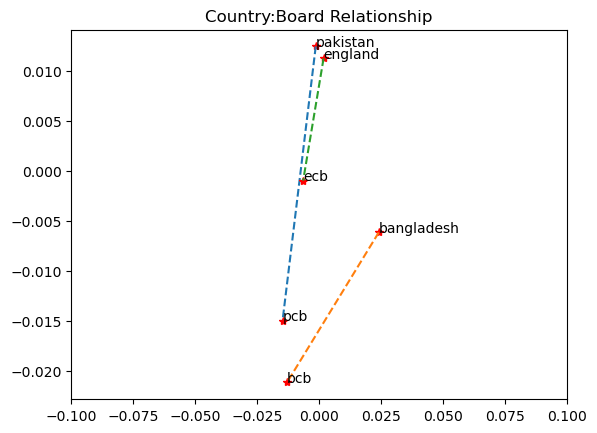

In [59]:
list1=["pakistan","bangladesh","england"]
list2=["pcb","bcb","ecb"]

for i in range(len(list1)):
    country=list1[i]
    board=list2[i]

    countryIndex=wordIndex[country]
    boardIndex=wordIndex[board]

    countryVector=reducedEmbedding[countryIndex]
    plt.plot(countryVector[0], countryVector[1], 'r*')
    plt.text(countryVector[0], countryVector[1],list1[i])
    
    boardVector=reducedEmbedding[boardIndex]
    plt.plot(boardVector[0], boardVector[1], 'r*')
    plt.text(boardVector[0], boardVector[1],list2[i])
    
    x_values = [countryVector[0], boardVector[0]]
    y_values = [countryVector[1], boardVector[1]]
    
    plt.plot(x_values,y_values, linestyle="--")
    plt.xlim(-0.1, 0.1)
    #plt.ylim(-0.15, 0.02)

plt.title('Country:Board Relationship')
plt.show()

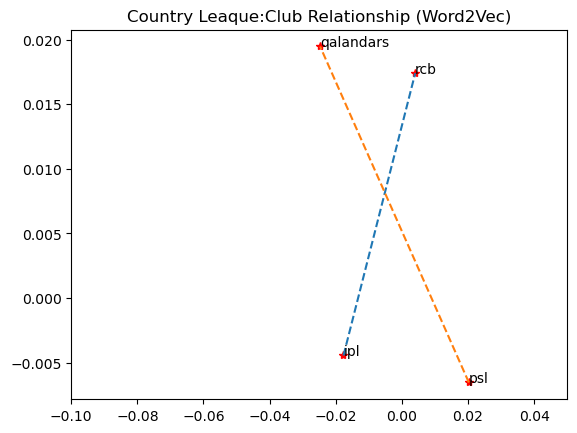

In [58]:
list1=["ipl","psl"]
list2=["rcb","qalandars"]

for i in range(len(list1)):
    country=list1[i]
    board=list2[i]

    countryIndex=wordIndex[country]
    boardIndex=wordIndex[board]

    countryVector=reducedEmbedding[countryIndex]
    plt.plot(countryVector[0], countryVector[1], 'r*')
    plt.text(countryVector[0], countryVector[1],list1[i])
    
    boardVector=reducedEmbedding[boardIndex]
    plt.plot(boardVector[0], boardVector[1], 'r*')
    plt.text(boardVector[0], boardVector[1],list2[i])
    
    x_values = [countryVector[0], boardVector[0]]
    y_values = [countryVector[1], boardVector[1]]
    
    plt.plot(x_values,y_values, linestyle="--")
    plt.xlim(-0.1, 0.05)
    #plt.ylim(-0.15, 0.02)
    
plt.title('Country Leaque:Club Relationship (Word2Vec)')
plt.show()

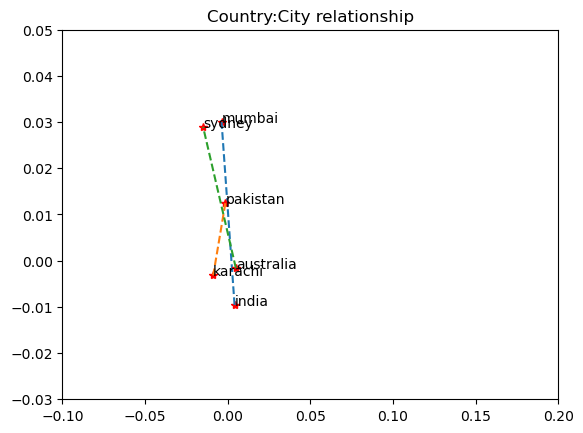

In [40]:
list1=["india","pakistan","australia"]
list2=["mumbai","karachi","sydney"]

for i in range(len(list1)):
    country=list1[i]
    board=list2[i]

    countryIndex=wordIndex[country]
    boardIndex=wordIndex[board]

    countryVector=reducedEmbedding[countryIndex]
    plt.plot(countryVector[0], countryVector[1], 'r*')
    plt.text(countryVector[0], countryVector[1],list1[i])
    
    boardVector=reducedEmbedding[boardIndex]
    plt.plot(boardVector[0], boardVector[1], 'r*')
    plt.text(boardVector[0], boardVector[1],list2[i])
    
    x_values = [countryVector[0], boardVector[0]]
    y_values = [countryVector[1], boardVector[1]]

    plt.plot(x_values,y_values, linestyle="--")
    plt.xlim(-0.1, 0.2)
    plt.ylim(-0.03, 0.05)

plt.title('Country:City relationship')
plt.show()

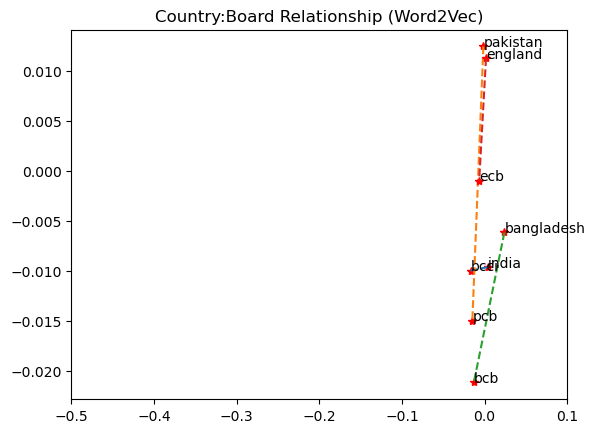

In [61]:
list1=["india","pakistan","bangladesh","england"]
list2=["bcci","pcb","bcb","ecb"]

for i in range(len(list1)):
    country=list1[i]
    board=list2[i]

    countryIndex=wordIndex[country]
    boardIndex=wordIndex[board]

    countryVector=reducedEmbedding[countryIndex]
    plt.plot(countryVector[0], countryVector[1], 'r*')
    plt.text(countryVector[0], countryVector[1],list1[i])
    
    boardVector=reducedEmbedding[boardIndex]
    plt.plot(boardVector[0], boardVector[1], 'r*')
    plt.text(boardVector[0], boardVector[1],list2[i])
    
    x_values = [countryVector[0], boardVector[0]]
    y_values = [countryVector[1], boardVector[1]]
    
    plt.plot(x_values,y_values, linestyle="--")
    plt.xlim(-0.5, 0.1)
    #plt.ylim(-0.15, 0.02)

plt.title('Country:Board Relationship (Word2Vec)')
plt.show()

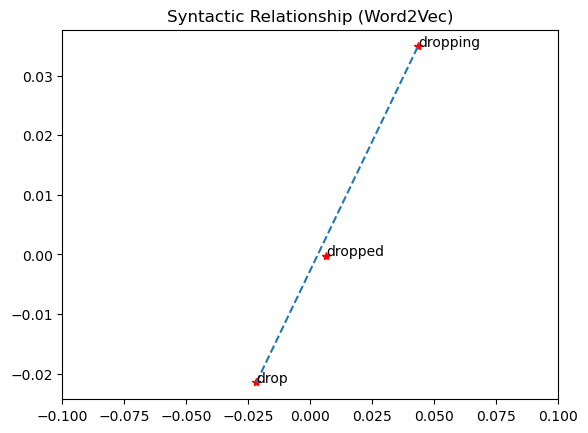

In [98]:
list1=["drop"]
list2=["dropping"]
list3=["dropped"]

for i in range(len(list1)):
    country=list1[i]
    board=list2[i]
    load=list3[i]
    
    countryIndex=wordIndex[country]
    boardIndex=wordIndex[board]
    loadIndex=wordIndex[load]
    
    countryVector=reducedEmbedding[countryIndex]
    plt.plot(countryVector[0], countryVector[1], 'r*')
    plt.text(countryVector[0], countryVector[1],list1[i])
    
    boardVector=reducedEmbedding[boardIndex]
    plt.plot(boardVector[0], boardVector[1], 'r*')
    plt.text(boardVector[0], boardVector[1],list2[i])
    
    loadVector=reducedEmbedding[loadIndex]
    plt.plot(loadVector[0], loadVector[1], 'r*')
    plt.text(loadVector[0], loadVector[1],list3[i])
    
    x_values = [countryVector[0], boardVector[0]]
    y_values = [countryVector[1], boardVector[1]]
    
    plt.plot(x_values,y_values, linestyle="--")
    plt.xlim(-0.1, 0.1)
    #plt.ylim(-0.15, 0.02)

plt.title('Syntactic Relationship (Word2Vec)')
plt.show()

In [88]:
from scipy import spatial
list1="virat"
list2="batsman"
list3="dhoni"
list4="captain"

#england-india+virat=root
print("****Using Word2Vec****")

country1=list1
board=list2
country2=list3
board1=list4

country1Index=wordIndex[country1]
boardIndex=wordIndex[board]
country2Index=wordIndex[country2]
board1Index=wordIndex[board1]

country1Vector=reducedEmbedding[country1Index]
country2Vector=reducedEmbedding[country2Index]


boardVector=reducedEmbedding[boardIndex]

board1Vector=reducedEmbedding[board1Index]

board1Vector=reducedEmbedding[board1Index]
print(list1+"------>"+list2)
print(list3+"------->??")

board2vector=country2Vector-country1Vector+boardVector
print("Predicted:")
print(board2vector)
print("Actual: "+list4)
print(board1Vector)



print("Cosine Similarity of Actual and Predicted:")


print(1-spatial.distance.cosine(board2vector, board1Vector))

print("Answer="+list4)

****Using Word2Vec****
virat------>batsman
dhoni------->??
Predicted:
[-0.00127705  0.04358973]
Actual: captain
[0.0016706  0.03077648]
Cosine Similarity of Actual and Predicted:
0.9965144748075125
Answer=captain


In [69]:
def vec_sim(v_w1, top_n):
    word_sim={}
    for i in range(len(s)):
        # Find the similary score for each word in vocab
        v_w2 = U_reduced[i]
        theta_sum = np.dot(v_w1, v_w2)
        theta_den = np.linalg.norm(v_w1) * np.linalg.norm(v_w2)
        theta = theta_sum / theta_den

        word=index_to_Word[i]
        word_sim[word] = theta

    words_sorted = sorted(word_sim.items(), key=lambda kv: kv[1], reverse=True)

    for word, sim in words_sorted[:top_n]:
        if(word=="england" or word=="india" or word=="pakistan" or word=="africa" or word=="australia"):
            print(word, sim)

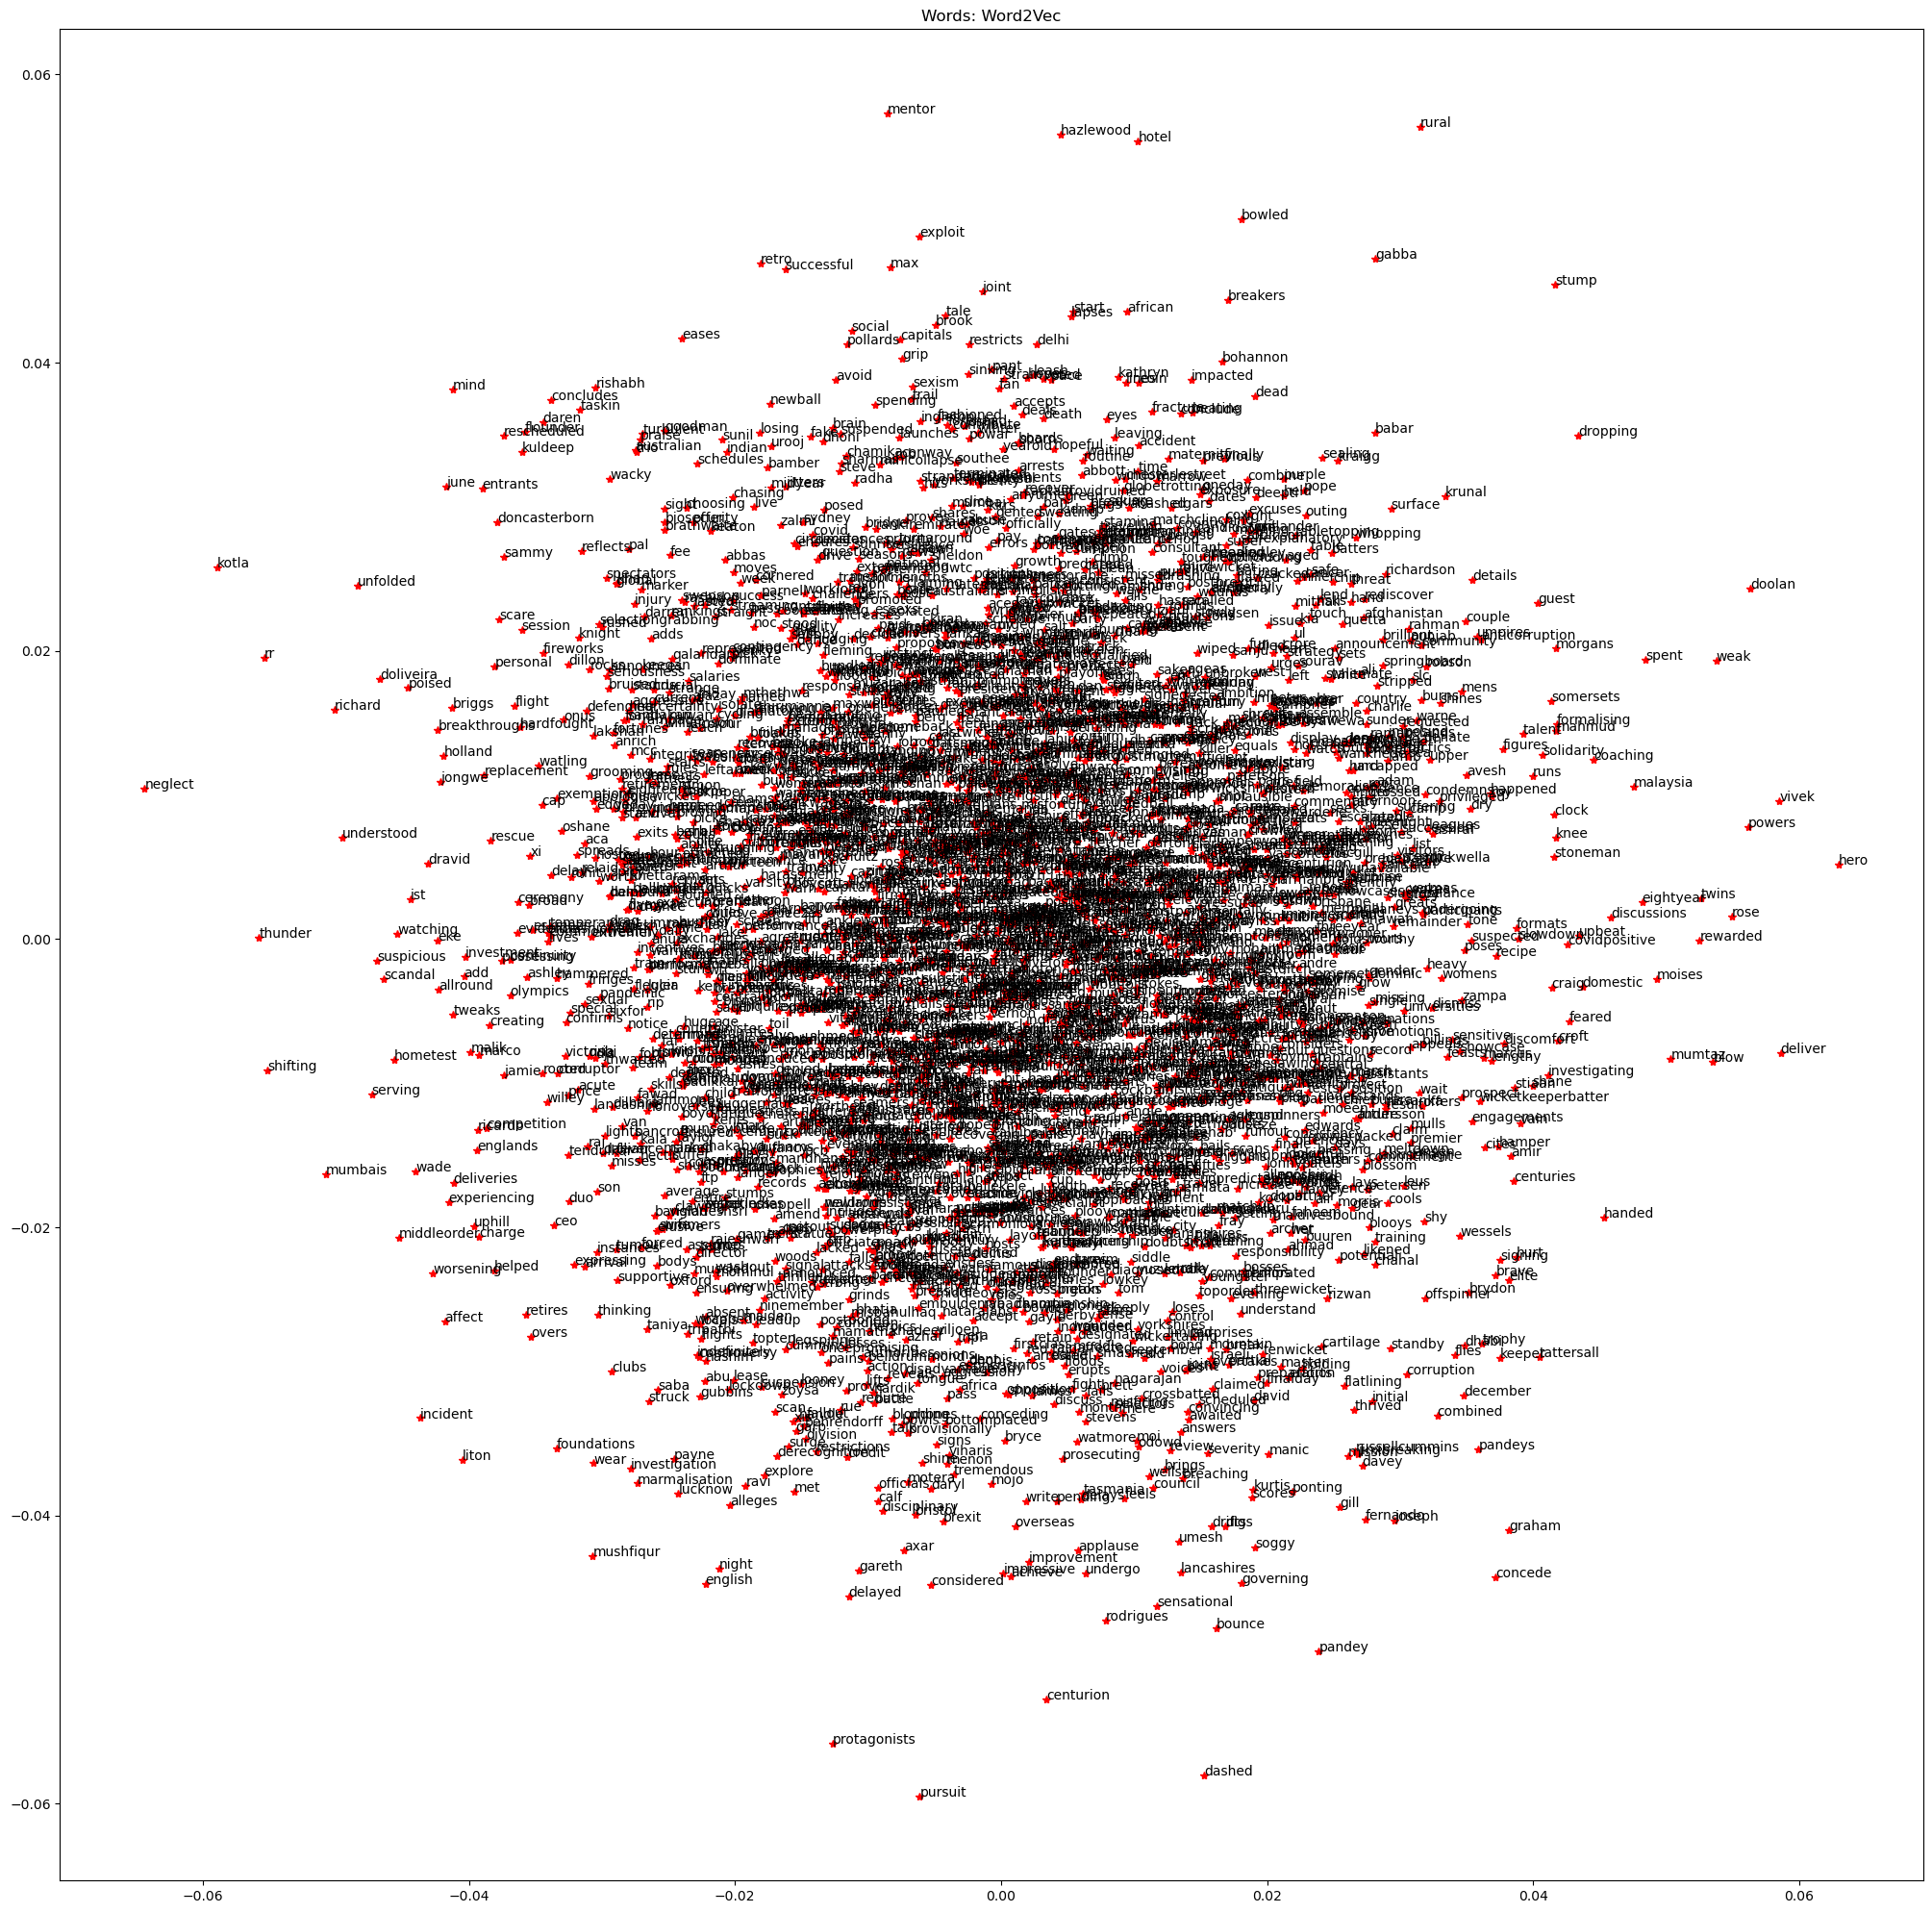

In [105]:
plt.figure(figsize=(25,25))
for i in range(len(indexWord)):
    country=indexWord[i]

    countryIndex=wordIndex[country]

    countryVector=reducedEmbedding[countryIndex]
    plt.plot(countryVector[0], countryVector[1], 'r*')
    plt.text(countryVector[0], countryVector[1],country)
    
    
    #x_values = [0, countryVector[0]]
    #y_values = [0, countryVector[1]]
    #plt.plot(x_values,y_values, linestyle="--")
    #plt.xlim(-0.5, 0.0)
    #plt.ylim(-0.15, 0.0)
plt.title('Words: Word2Vec')
plt.show()